# Week Four

## Lecture 1: Introduction

In [1]:
# We doin statistics baby! Kind of.

## Lecture 2: Distributions

In [2]:
# Flipping a coin is like Tornado events in Ann Arbor
# Numpy has distributions built in

In [1]:
import pandas as pd
import numpy as np

In [5]:
np.random.binomial(1, 0.5)

1

In [6]:
np.random.binomial(1000, 0.5) / 1000

0.475

In [7]:
# You can also have unevenly weighted binomial distributions
chance_of_tornado = 0.01 / 100
np.random.binomial(100000, chance_of_tornado)

5

In [8]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)

two_days_in_a_row = 0
for j in range(1, len(tornado_events) - 1):
    if tornado_events[j] == 1 and tornado_events[j-1] == 1:
        two_days_in_a_row += 1
        
print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

96 tornadoes back to back in 2739.72602739726 years


## More Distributions

In [10]:
distribution = np.random.normal(0.75, size=1000)

np.sqrt(np.sum((np.mean(distribution) - distribution)**2) / len(distribution))

1.024109290634432

In [11]:
np.std(distribution)

1.024109290634432

In [12]:
import scipy.stats as stats

stats.kurtosis(distribution)

-0.2891818207765766

In [13]:
stats.skew(distribution)

-0.10904357781358756

In [14]:
# chi-squared distribution
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

2.0620381344263117

In [22]:
chi_squared_df5 = np.random.chisquare(20, size=10000)
stats.skew(chi_squared_df5)

0.6489282561006418

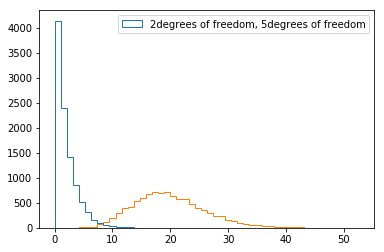

In [23]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2, chi_squared_df5], bins=50, histtype='step', label=['2degrees of freedom, 5degrees of freedom'])
plt.legend(loc='upper right')

In [24]:
# Bimodal distributions - can be modelled sometimes by multiple 
# normal distributions added together

## Hypothesis Testing in Python

In [25]:
# Hypothesis - a statement that we can test
# Alternative hypothesis - there is a difference b/w groups
# Null Hypothesis - there is no difference b/w groups

In [26]:
df = pd.read_csv('../data/grades.csv')

In [27]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [29]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [30]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [31]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [32]:
# alpha = the threshold as to how much chance you're willing 
# to accept
# Typical values in social sciences are 0.1, 0.05, or 0.01

In [33]:
# using threshold of 0.05 for alpha
from scipy import stats

In [34]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [35]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [36]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.08710151634155668)

In [37]:
stats.ttest_ind(early['assignment4_grade'], late['assignment4_grade'])

Ttest_indResult(statistic=0.16232182017140787, pvalue=0.8710666110447575)

In [39]:
# p-hacking results in spurious correlations instead of 
# generalizable results
# Bonferroni - tighten alpha based on the number of tests you run
# hold-out sets - hold out some of the data to see how generalizable
# information is
# Investigation pre-registration - outline what you expect to find
# and why, and backup the tests with a positive proof. Usually 
# check with third party like a journal